## Analyze Fiit's Like Study (Line) Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style = "whitegrid")

In [2]:
def getAngle(cnt, cycle = 11) :
    
    n = (cnt%2 * cycle//2 + cnt//2 + cnt%2) % cycle
    angle = (360/cycle)*n
    
    return angle

In [15]:
# Effective Target Angel : Except smallest two, Largest two, and three middle Angle

def isEffAngle(cnt, cycle = 11) :
    
    EffAngle = []
    for i in range(1, cycle+1) :
        
        Center = cycle//2 + 1
        
        if (i > 2 and i < Center-1) or (i > Center+1 and i < cycle-1) : 
            EffAngle.append(i)
            
    return cnt in EffAngle
        

In [16]:
_dir = r"DualSensorMouse_Fittslike_Test\Logs"

In [17]:
os.listdir(_dir)

['aaa_onlyline1',
 'aaa_withdot1',
 'BMH_circle1',
 'RYS_onlyline1',
 'RYS_withdot1',
 '김문정_onlyline1',
 '김문정_withdot1',
 '백민혁_line1 - 복사본 - 복사본',
 '백민혁_onlyline1',
 '백민혁_onlyline2',
 '백민혁_withdot1',
 '백민혁_withdot2',
 '최효빈_onlyline1',
 '최효빈_withdot1']

In [18]:
Username = "BMH"
UsernameC = "_circle1"

In [19]:
_dirC = _dir+f"/{Username+UsernameC}"

In [20]:
dirlstW = os.listdir(_dirC)
dirlstW

['2024_03_05_13_00_47_Practice_800_50_logs']

---

In [22]:
dflstW = []

for dw in dirlstW :
    
    Dirw = _dirC + f"/{dw}/Pos_values.csv"
    dfw = pd.read_csv(Dirw)
    dfw = dfw[dfw["Success"] == "T"]
    dflstW.append(dfw)

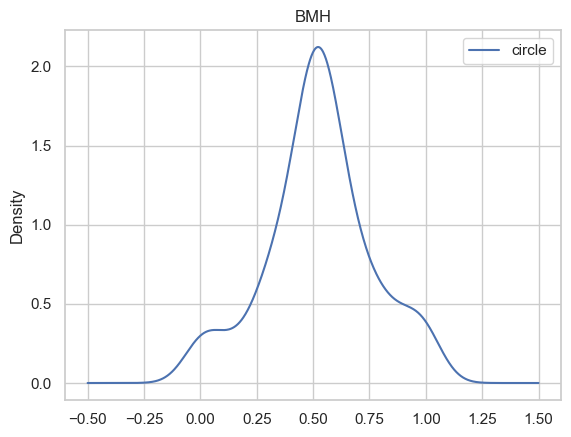

In [24]:
for dfw in dflstW :
    
    dfw["PositionValue"].plot.density(label="circle")
    plt.legend()
    plt.title(Username)

Center of Mass for dfC: 0.5286821705426357


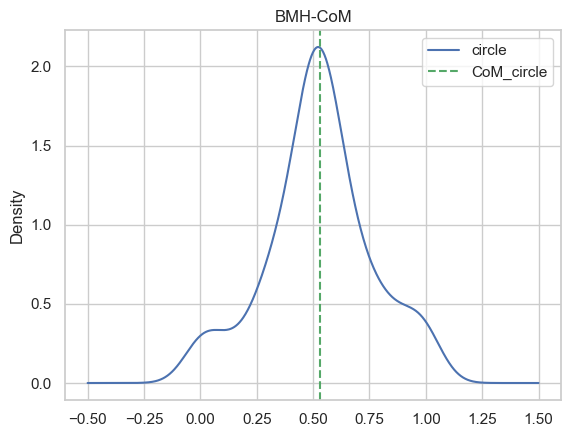

In [25]:
data_dfw = dfw["PositionValue"]

histw, bin_edgesw = np.histogram(data_dfw, bins=30, density=True)

bin_centersw = (bin_edgesw[:-1] + bin_edgesw[1:]) / 2

com_dfw = np.sum(bin_centersw * histw) / np.sum(histw)

print("Center of Mass for dfC:", com_dfw)

dfw["PositionValue"].plot.density(label="circle")
plt.axvline(x=com_dfw, color='g', linestyle='--', label='CoM_circle')
plt.legend()
plt.title(Username+"-CoM")
plt.show()

### Analyze Simply Merged Data

In [12]:
df_merge = pd.concat(dflst)
df_merge["Angle"] = df_merge["Count"].map(lambda x : getAngle(x))

NameError: name 'dflst' is not defined

In [ ]:
fig, axes = plt.subplots(1, 2)
df_merge.PositionValue.plot.density(ax = axes[0])
df_merge.PositionValue.plot.hist(ax = axes[1], bins = 20)

In [ ]:
df_merge[df_merge["Angle"] > 180.0]["PositionValue"].plot.density() # Blue
df_merge[df_merge["Angle"] < 180.0]["PositionValue"].plot.density() # Orange

In [ ]:
sns.scatterplot(x = df_merge.Angle, y = df_merge.PositionValue)

---

### Analyze Mean Value Data

In [ ]:
df_mean = dflst[0]

for i in range(1, len(dflst)) :
    
    df_left = df_mean
    df_right = dflst[i]
    
    df_mean = pd.merge(df_left, df_right, on = ["Distance", "Width", "Count", "Success"])
    df_mean["PositionValue"] = (df_mean["PositionValue_x"] + df_mean["PositionValue_y"])/2
    df_mean = df_mean[["Distance", "Width", "Count", "Success", "PositionValue"]]
    
df_mean = df_mean.groupby(["Distance", "Width", "Count", "Success"])["PositionValue"].mean().reset_index()

In [ ]:
df_mean["Angle"] = df_mean["Count"].map(lambda x : getAngle(x))

In [ ]:
fig, axes = plt.subplots(1, 2)
df_mean.PositionValue.plot.density(ax = axes[0])
df_mean.PositionValue.plot.hist(ax = axes[1], bins = 20)

In [ ]:
df_mean[df_mean["Angle"] > 180.0]["PositionValue"].plot.density() # Blue
df_mean[df_mean["Angle"] < 180.0]["PositionValue"].plot.density() # Orange

In [ ]:
sns.scatterplot(x = df_mean.Angle, y = df_mean.PositionValue)

---

### Analyze Filtered Data (by Target Angle)

In [ ]:
df_fil = pd.concat(dflst)
df_fil["Angle"] = df_fil["Count"].map(getAngle)
df_fil["EffAngle"] = df_fil["Count"].map(isEffAngle)

In [ ]:
df_fil = df_fil[df_fil["EffAngle"]]

In [ ]:
fig, axes = plt.subplots(1, 2)
df_fil.PositionValue.plot.density(ax = axes[0])
df_fil.PositionValue.plot.hist(ax = axes[1], bins = 20)

In [ ]:
df_fil[df_fil["Angle"] > 180.0]["PositionValue"].plot.density() # Blue
df_fil[df_fil["Angle"] < 180.0]["PositionValue"].plot.density() # Orange

In [ ]:
sns.scatterplot(x = df_fil.Angle, y = df_fil.PositionValue)

---

### Split By Direction (Left -> Right / Right -> Left)

In [ ]:
df_lr = df_merge[df_merge["Count"] % 2 == 0] # Left -> Right
df_rl = df_merge[df_merge["Count"] % 2 == 1] # Right -> Left

In [ ]:
df_lr.PositionValue.plot.density() # Blue
df_rl.PositionValue.plot.density() # Orange

In [ ]:
cnt = []
cnt.append(df_lr.PositionValue.value_counts()[0.00])
cnt.append(df_rl.PositionValue.value_counts()[0.00])
cnt.append(df_lr.PositionValue.value_counts()[1.00])
cnt.append(df_rl.PositionValue.value_counts()[1.00])

print(f"Left -> Right   0.00 <{cnt[0]}>   1.00 <{cnt[2]}>")
print(f"Right -> Left   0.00 <{cnt[1]}>   1.00 <{cnt[3]}>")

In [ ]:
fig, axes = plt.subplots(1, 2, sharey = True)

sns.scatterplot(x = df_lr.Angle, y = df_lr.PositionValue, ax = axes[0]).set_title("Left -> Right")
sns.scatterplot(x = df_rl.Angle, y = df_rl.PositionValue, ax = axes[1]).set_title("Right -> Left")

 ---